In [1]:
!pip install pygame
import gym
import numpy as np
from pprint import pprint
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [43]:
class PolicyIterationAgent:
    def __init__(self, env):
        self.env = env
        self.observation_dim = env.observation_space.n
        self.actions_variants = np.arange(env.action_space.n)
        self.policy_probs = np.full((self.observation_dim, len(self.actions_variants)), 1.0 / len(self.actions_variants))
        self.state_values = np.zeros(self.observation_dim)
        self.maxNumberOfIterations = 1000
        self.theta = 1e-6
        self.gamma = 0.99

    def print_policy(self):
        print('Policy:')
        pprint(self.policy_probs)

    def policy_evaluation(self):
        value_function_vector = self.state_values.copy()
        for _ in range(self.maxNumberOfIterations):
            value_function_vector_next_iteration = np.zeros(self.observation_dim)
            for state in range(self.observation_dim):
                action_probabilities = self.policy_probs[state]
                for action in self.actions_variants:
                    inner_sum = 0
                    for probability, next_state, reward, _ in self.env.P[state][action]:
                        inner_sum += probability * (reward + self.gamma * self.state_values[next_state])
                    value_function_vector_next_iteration[state] += action_probabilities[action] * inner_sum
            if np.max(np.abs(value_function_vector_next_iteration - value_function_vector)) < self.theta:
                value_function_vector = value_function_vector_next_iteration
                break
            value_function_vector = value_function_vector_next_iteration
        return value_function_vector

    def policy_improvement(self):
        q_values_matrix = np.zeros((self.observation_dim, len(self.actions_variants)))
        improved_policy = np.zeros((self.observation_dim, len(self.actions_variants)))
        for state in range(self.observation_dim):
            for action in self.actions_variants:
                for probability, next_state, reward, _ in self.env.P[state][action]:
                    q_values_matrix[state, action] += probability * (reward + self.gamma * self.state_values[next_state])
            best_action_index = np.where(q_values_matrix[state, :] == np.max(q_values_matrix[state, :]))[0]
            improved_policy[state, best_action_index] = 1.0 / len(best_action_index)
        return improved_policy

    def policy_iteration(self, num_iterations):
        for i in range(1, num_iterations + 1):
            self.state_values = self.policy_evaluation()
            self.policy_probs = self.policy_improvement()
        print(f'Algorithm completed in {i} iterations.')
        

    def visualize_policy(self):
        state_labels = ['R', 'G', 'Y', 'B', 'T', 'D']  # Labels for states
        action_labels = ['↓', '↑', '←', '→', 'P', 'D']  # Labels for actions

        fig, ax = plt.subplots(figsize=(6, 8))
        ax.set_title('Policy Iteration - Taxi-v3')
        ax.axis('off')

        table = ax.table(cellText=np.round(self.policy_probs, 2), cellLoc='center', colLabels=action_labels,
                         loc='center')

        table.scale(1, 2)
        table.set_fontsize(14)
        table.auto_set_column_width(col=list(range(6)))

        plt.show()


Algorithm completed in 1000 iterations.


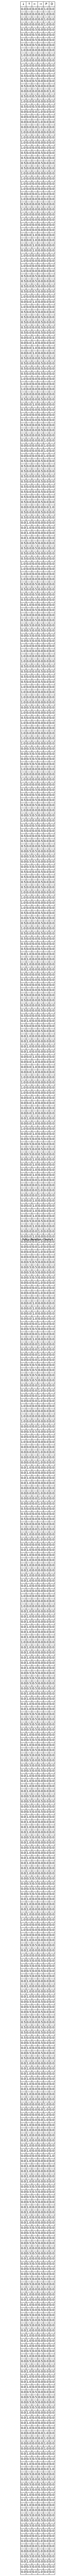

In [44]:
# Create the environment and agent
env = gym.make('Taxi-v3')
agent = PolicyIterationAgent(env)

# Perform policy iteration
agent.policy_iteration(1000)

# Visualize the final policy
agent.visualize_policy()